In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCuantico:
    def __init__(self, ket):
        self.ket = self.normalizar(ket)

    def normalizar(self, ket):
        norma = np.linalg.norm(ket)
        return ket / norma if norma != 0 else ket
    
    def verificar_hermiticidad(self, matriz):
        return np.allclose(matriz, matriz.conj().T)
    
    def valores_y_probabilidades_propios(self, matriz):
        if not self.verificar_hermiticidad(matriz):
            raise ValueError("La matriz no es hermitiana")
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        probabilidades = np.abs(vectores_propios.conj().T @ self.ket) ** 2
        return valores_propios, vectores_propios, probabilidades
    
    def evolucion_estado(self, operadores):
        estado = self.ket
        for U in operadores:
            estado = U @ estado
        return estado
    
    def graficar_probabilidades(self, probabilidades):
        plt.bar([f"Estado {i+1}" for i in range(len(probabilidades))], probabilidades)
        plt.title("Distribución de Probabilidad de Transición")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.show()

# Explicación del Código: Simulador Cuántico

## Introducción
Este código implementa un simulador cuántico que trabaja con estados cuánticos (kets) y observables (matrices hermitianas). Permite normalizar estados, verificar la hermiticidad de una matriz, calcular valores propios y probabilidades de transición, y simular la evolución de un estado aplicando operadores.

## Clase `SimuladorCuantico`
La clase `SimuladorCuantico` encapsula las funciones principales:

- `__init__(self, ket)`: Inicializa el simulador con un estado normalizado.
- `normalizar(self, ket)`: Normaliza un vector para que su norma sea 1.
- `verificar_hermiticidad(self, matriz)`: Verifica si una matriz es hermitiana.
- `valores_y_probabilidades_propios(self, matriz)`: Calcula los valores propios y sus probabilidades de transición.
- `evolucion_estado(self, operadores)`: Aplica operadores sucesivamente al estado cuántico.
- `graficar_probabilidades(self,probabilidades)`: Grafica la distribucion de probabilidades del sistema dado.



# **Ejercicio 4.3.1: Medición en Sistemas Cuánticos**  

En este ejercicio, exploramos el colapso del estado cuántico tras la medición de un observable \(\Omega\).  


### **Objetivos**  
1. Determinar los estados posibles después de una medición.  
2. Calcular la probabilidad de transición a cada autoestado.  
3. Obtener el valor esperado de $\Omega$ en un estado dado.  


### **Pasos a seguir**  
1. **Verificar los valores propios y autoestados de $\Omega$**  
   - Se extraen los valores propios $\lambda_1, \lambda_2$ y los vectores propios correspondientes.  
2. **Simular la medición de $\Omega$ sobre un estado inicial $\lvert \psi \rangle$**  
   - Se proyecta $\lvert \psi \rangle$ sobre los autoestados de $\Omega$.  
   - Se calculan las probabilidades de transicion.  
3. **Calcular el valor esperado de $\Omega$ en el estado $\lvert \psi \rangle$**  
   - Se usa la fórmula $\langle \Omega \rangle_\psi = \sum |c_i|^2 \lambda_i$.  


### **Explicación del codigo**  
- Se normaliza el estado inicial $\lvert \psi \rangle$.  
- Se calculan los valores propios y vectores propios de $\Omega$.  
- Se proyecta $\lvert \psi \rangle$ en la base de vectores propios y se calculan probabilidades.  
- Se obtiene el valor esperado de $\Omega$.  
- Se grafican las probabilidades de transición.  



Estado inicial:
[1.+0.j 0.+0.j]

Estado después de aplicar el operador Sx:
[0.+0.j 1.+0.j]

Valores propios de Sx: [-1.  1.]

Estados propios de Sx:
Estado propio para λ = -1.0: [-0.70710678+0.j  0.70710678+0.j]
Estado propio para λ = 1.0: [0.70710678+0.j 0.70710678+0.j]

Probabilidades de transición a cada estado propio:
P(transición al estado propio 1) = 0.5000 (50.0%)
P(transición al estado propio 2) = 0.5000 (50.0%)


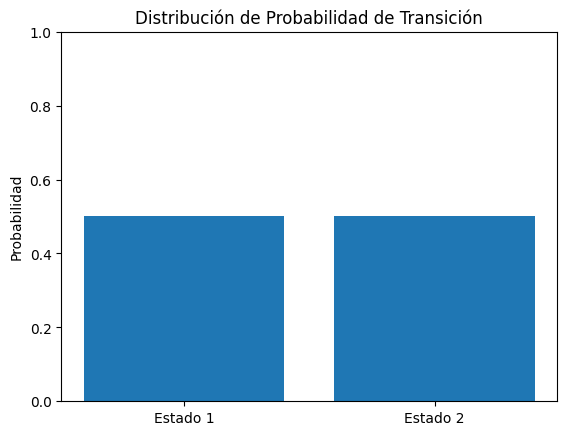

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCuantico:
    def __init__(self, ket):
        self.ket = self.normalizar(ket)

    def normalizar(self, ket):
        norma = np.linalg.norm(ket)
        return ket / norma if norma != 0 else ket
    
    def verificar_hermiticidad(self, matriz):
        return np.allclose(matriz, matriz.conj().T)
    
    def valores_y_probabilidades_propios(self, matriz):
        if not self.verificar_hermiticidad(matriz):
            raise ValueError("La matriz no es hermitiana")
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        probabilidades = np.abs(vectores_propios.conj().T @ self.ket) ** 2
        return valores_propios, vectores_propios, probabilidades
    
    def evolucion_estado(self, operadores):
        estado = self.ket
        for U in operadores:
            estado = U @ estado
        return estado
    
    def graficar_probabilidades(self, probabilidades):
        plt.bar([f"Estado {i+1}" for i in range(len(probabilidades))], probabilidades)
        plt.title("Distribución de Probabilidad de Transición")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.show()

spin_up = np.array([1, 0], dtype=complex)
Sx = np.array([[0, 1], [1, 0]], dtype=complex)

simulador = SimuladorCuantico(spin_up)
phi = simulador.evolucion_estado([Sx])
nuevo_simulador = SimuladorCuantico(phi)
valores, vectores, probabilidades = nuevo_simulador.valores_y_probabilidades_propios(Sx)

print("Estado inicial:")
print(spin_up)
print("\nEstado después de aplicar el operador Sx:")
print(phi)
print("\nValores propios de Sx:", valores)
print("\nEstados propios de Sx:")
for i in range(len(vectores)):
    print(f"Estado propio para λ = {valores[i]}: {vectores[:, i]}")
print("\nProbabilidades de transición a cada estado propio:")
for i, prob in enumerate(probabilidades):
    print(f"P(transición al estado propio {i+1}) = {prob:.4f} ({prob*100:.1f}%)")

nuevo_simulador.graficar_probabilidades(probabilidades)



# **Ejercicio 4.3.2: Distribución de Probabilidad de los valores propios**  

En este ejercicio, repetimos los cálculos del Ejercicio 4.3.1 y obtenemos la distribución de probabilidad de los valores propios.  


### **Objetivos**  
1. Determinar los estados posibles despues de una medición del operador $ S_x $.  
2. Calcular la probabilidad de transicion a cada autoestado.  
3. Obtener el valor medio del observable $ S_x $.  
4. Graficar la distribución de probabilidades.  


### **Pasos a seguir**  
1. **Aplicar la evolucion del estado**  
   - Se usa un operador $ S_x $ sobre un estado inicial $ | \uparrow \rangle $.  
2. **Calcular valores propios y vectores propios del operador $ S_x $**  
   - Se obtiene la descomposicion espectral de $ S_x $.  
3. **Calcular la probabilidad de transicion**  
   - Se proyecta el estado resultante en los vectores propios y se obtienen las probabilidades.  
4. **Calcular el valor medio de $ S_x $**  
   - Se usa la fórmula:  
     $
     \langle S_x \rangle = \sum |c_i|^2 \lambda_i
     $  
5. **Graficar la distribución de probabilidades**  
   - Se representa la probabilidad de transición a cada autoestado.  


### **Explicación del Código**  
- Se normaliza el estado inicial $ | \uparrow \rangle $.  
- Se aplica el operador $ S_x $ para obtener un nuevo estado.  
- Se extraen valores propios y vectores propios de $ S_x $.  
- Se calculan las probabilidades de transición y el valor medio de $ S_x $.  
- Se genera una gráfica de distribución de probabilidades.  




Estado inicial:
[1.+0.j 0.+0.j]

Estado después de aplicar el operador Sx:
[0.+0.j 1.+0.j]

Valores propios de Sx: [-1.  1.]

Estados propios de Sx:
Estado propio para λ = -1.0: [-0.70710678+0.j  0.70710678+0.j]
Estado propio para λ = 1.0: [0.70710678+0.j 0.70710678+0.j]

Probabilidades de transición a cada estado propio:
P(transición al estado propio 1) = 0.5000 (50.0%)
P(transición al estado propio 2) = 0.5000 (50.0%)

Valor medio de la distribución: 0.0


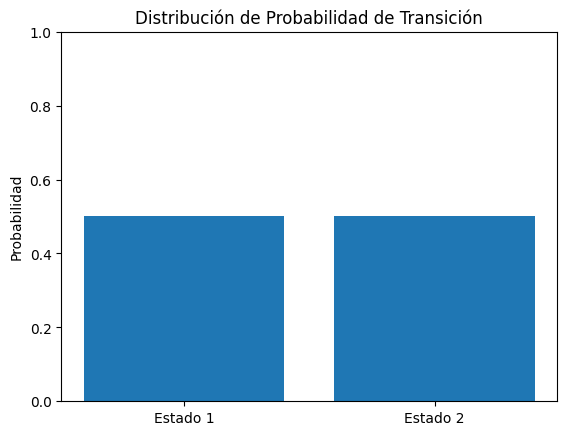

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCuantico:
    def __init__(self, ket):
        self.ket = self.normalizar(ket)

    def normalizar(self, ket):
        norma = np.linalg.norm(ket)
        return ket / norma if norma != 0 else ket
    
    def verificar_hermiticidad(self, matriz):
        return np.allclose(matriz, matriz.conj().T)
    
    def valores_y_probabilidades_propios(self, matriz):
        if not self.verificar_hermiticidad(matriz):
            raise ValueError("La matriz no es hermitiana")
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        probabilidades = np.abs(vectores_propios.conj().T @ self.ket) ** 2
        return valores_propios, vectores_propios, probabilidades
    
    def evolucion_estado(self, operadores):
        estado = self.ket
        for U in operadores:
            estado = U @ estado
        return estado
    
    def graficar_probabilidades(self, probabilidades):
        plt.bar([f"Estado {i+1}" for i in range(len(probabilidades))], probabilidades)
        plt.title("Distribución de Probabilidad de Transición")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.show()

    def calcular_valor_medio(self, matriz):
        valores_propios, _, probabilidades = self.valores_y_probabilidades_propios(matriz)
        return np.sum(valores_propios * probabilidades)

spin_up = np.array([1, 0], dtype=complex)
Sx = np.array([[0, 1], [1, 0]], dtype=complex)

simulador = SimuladorCuantico(spin_up)
phi = simulador.evolucion_estado([Sx])
nuevo_simulador = SimuladorCuantico(phi)
valores, vectores, probabilidades = nuevo_simulador.valores_y_probabilidades_propios(Sx)
valor_medio = nuevo_simulador.calcular_valor_medio(Sx)

print("Estado inicial:")
print(spin_up)
print("\nEstado después de aplicar el operador Sx:")
print(phi)
print("\nValores propios de Sx:", valores)
print("\nEstados propios de Sx:")
for i in range(len(vectores)):
    print(f"Estado propio para λ = {valores[i]}: {vectores[:, i]}")
print("\nProbabilidades de transición a cada estado propio:")
for i, prob in enumerate(probabilidades):
    print(f"P(transición al estado propio {i+1}) = {prob:.4f} ({prob*100:.1f}%)")
print("\nValor medio de la distribución:", valor_medio)

nuevo_simulador.graficar_probabilidades(probabilidades)

# Ejercicio 4.4.1: Verificación de Matrices Unitarias con el Simulador Cuántico  

En este ejercicio, verificamos que las matrices unitarias $ U_1 $ y $ U_2 $ cumplen la propiedad:  

$
U U^\dagger = I
$

y que su producto también es unitario.  

### **Pasos a seguir**  
1. Implementamos el método `es_unitaria(matriz)` dentro de la clase `SimuladorCuantico`.  
2. Verificamos que $ U_1 $ y $ U_2 $ son unitarias.  
3. Multiplicamos $ U_1 $ por $ U_2 $ y verificamos si el resultado es unitario.  

### **Explicación del Código**  
- Se añade el método `es_unitaria()` a la clase `SimuladorCuantico` para comprobar si una matriz cumple $ U U^\dagger = I $.  
- Se definen las matrices $ U_1 $ y $ U_2 $ y se usa `es_unitaria()` para verificar su propiedad.  
- Se multiplica $ U_1 $ por $ U_2 $ y se vuelve a comprobar si el resultado es unitario.  



In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCuantico:
    def __init__(self, ket):
        self.ket = self.normalizar(ket)

    def normalizar(self, ket):
        norma = np.linalg.norm(ket)
        return ket / norma if norma != 0 else ket
    
    def verificar_hermiticidad(self, matriz):
        return np.allclose(matriz, matriz.conj().T)
    
    def valores_y_probabilidades_propios(self, matriz):
        if not self.verificar_hermiticidad(matriz):
            raise ValueError("La matriz no es hermitiana")
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        probabilidades = np.abs(vectores_propios.conj().T @ self.ket) ** 2
        return valores_propios, vectores_propios, probabilidades
    
    def evolucion_estado(self, operadores):
        estado = self.ket
        for U in operadores:
            estado = U @ estado
        return estado
    
    def graficar_probabilidades(self, probabilidades):
        plt.bar([f"Estado {i+1}" for i in range(len(probabilidades))], probabilidades)
        plt.title("Distribución de Probabilidad de Transición")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.show()

    def calcular_valor_medio(self, matriz):
        valores_propios, _, probabilidades = self.valores_y_probabilidades_propios(matriz)
        return np.sum(valores_propios * probabilidades)

    def es_unitaria(self, matriz):
        identidad = np.eye(len(matriz))
        return np.allclose(matriz @ matriz.conj().T, identidad)

U1 = np.array([[0, 1], [1, 0]], dtype=complex)
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]], dtype=complex)

simulador = SimuladorCuantico(np.array([1, 0], dtype=complex))

print("U1 es unitaria:", simulador.es_unitaria(U1))
print("U2 es unitaria:", simulador.es_unitaria(U2))

U_producto = U1 @ U2

print("U1 * U2 es unitaria:", simulador.es_unitaria(U_producto))


U1 es unitaria: True
U2 es unitaria: True
U1 * U2 es unitaria: True


# Ejercicio 4.4.2: Evolución del Estado Cuántico  

En este ejercicio, analizamos la evolución de un sistema cuántico con el operador unitario dado.  

### **Datos del Problema**  
- Estado inicial:  
  $
  \ket{\psi_0} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
  $  
- Operador unitario $ U $:  
  $
  U =
  \begin{bmatrix}
  0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
  \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
  \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}} \\
  0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
  \end{bmatrix}
  $  
- Queremos encontrar el estado del sistema después de tres pasos de tiempo.  
- Calcularemos la probabilidad de encontrar la partícula en la posición 3.  

### **Pasos de la Solucion**  
1. Aplicamos el operador $ U $ tres veces al estado inicial.  
2. Examinamos la distribución de probabilidades en cada posición.  
3. Extraemos la probabilidad de la tercera posición.  



In [16]:
import numpy as np
import matplotlib.pyplot as plt

class SimuladorCuantico:
    def __init__(self, ket):
        self.ket = self.normalizar(ket)

    def normalizar(self, ket):
        norma = np.linalg.norm(ket)
        return ket / norma if norma != 0 else ket
    
    def verificar_hermiticidad(self, matriz):
        return np.allclose(matriz, matriz.conj().T)
    
    def valores_y_probabilidades_propios(self, matriz):
        if not self.verificar_hermiticidad(matriz):
            raise ValueError("La matriz no es hermitiana")
        valores_propios, vectores_propios = np.linalg.eigh(matriz)
        probabilidades = np.abs(vectores_propios.conj().T @ self.ket) ** 2
        return valores_propios, vectores_propios, probabilidades
    
    def evolucion_estado(self, operadores):
        estado = self.ket
        for U in operadores:
            estado = U @ estado
        return estado
    
    def graficar_probabilidades(self, probabilidades):
        plt.bar([f"Estado {i+1}" for i in range(len(probabilidades))], probabilidades)
        plt.title("Distribución de Probabilidad de Transición")
        plt.ylabel("Probabilidad")
        plt.ylim(0, 1)
        plt.show()

    def calcular_valor_medio(self, matriz):
        valores_propios, _, probabilidades = self.valores_y_probabilidades_propios(matriz)
        return np.sum(valores_propios * probabilidades)

    def es_unitaria(self, matriz):
        identidad = np.eye(len(matriz))
        return np.allclose(matriz @ matriz.conj().T, identidad)

psi_0 = np.array([1, 0, 0, 0], dtype=complex)

U = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
], dtype=complex)

simulador = SimuladorCuantico(psi_0)

# Aplicar la evolución tres veces
estado_final = simulador.evolucion_estado([U, U, U])

# Calcular la probabilidad en la posición 3 (índice 2)
probabilidad_posicion_3 = np.abs(estado_final[2])**2

print("Estado final después de 3 pasos:")
print(estado_final)
print(f"\nProbabilidad de encontrar la partícula en la posición 3: {probabilidad_posicion_3:.4f}")


Estado final después de 3 pasos:
[ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]

Probabilidad de encontrar la partícula en la posición 3: 0.0000
